<a href="https://colab.research.google.com/github/nestormontano/PrDS_2024__PredictingChurnForBankCustomers/blob/main/edapy_grupo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **GRUPO # 5**
## Kleber Gaibor  y Javier Hernandez

In [ ]:
pip install skimpy

In [1]:
import numpy as np
import pandas as pd

In [2]:
import skimpy

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(palette="Set2")

In [23]:
data= pd.read_csv('/content/Churn_Modelling.csv')

In [24]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


EDA Bivariado

In [25]:
df = data;
df['HasCrCard']= df.apply( lambda x: 'si' if x['HasCrCard'] == 0 else 'no', axis=1)

In [26]:
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='HasCrCard', ylabel='count'>

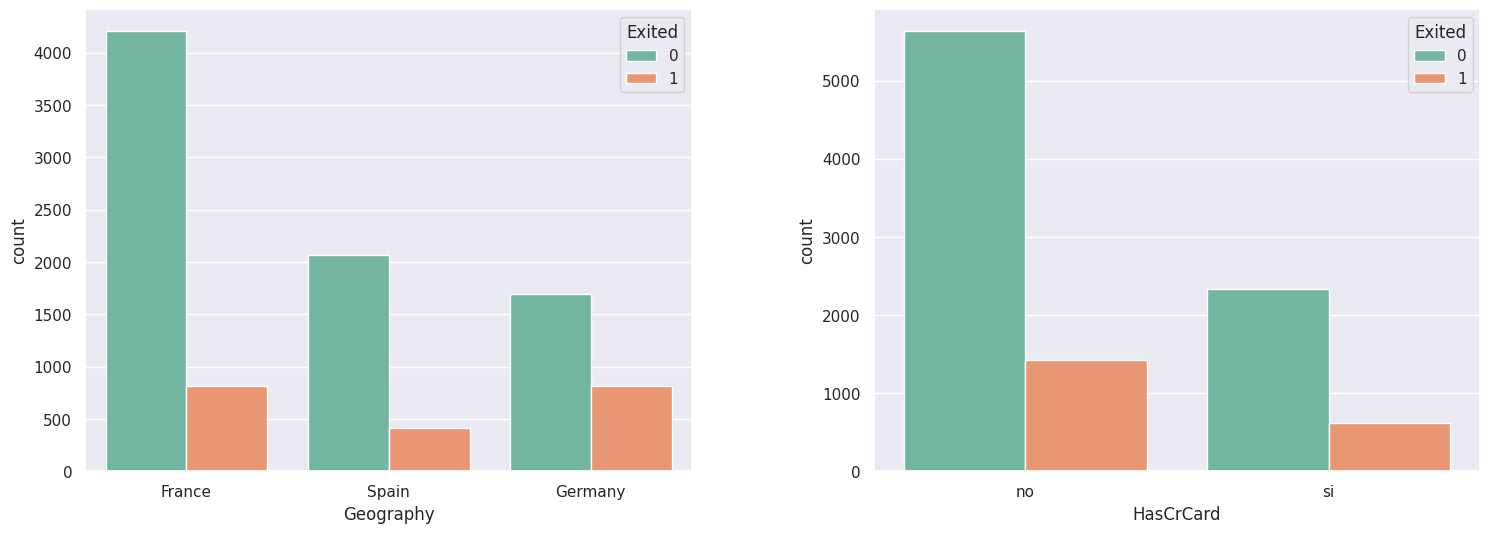

In [27]:
_, ax = plt.subplots(1, 2, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "Geography", hue="Exited", data = df, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[1])


Graficos de dispersion de todos contra todos (ggally corrplot)

In [16]:

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [28]:
encoder = LabelEncoder()
df2 = data;
df2["Geography"] = encoder.fit_transform(df2["Geography"])
df2["Gender"] = encoder.fit_transform(df2["Gender"])
df2["HasCrCard"] = encoder.fit_transform(df2["HasCrCard"])

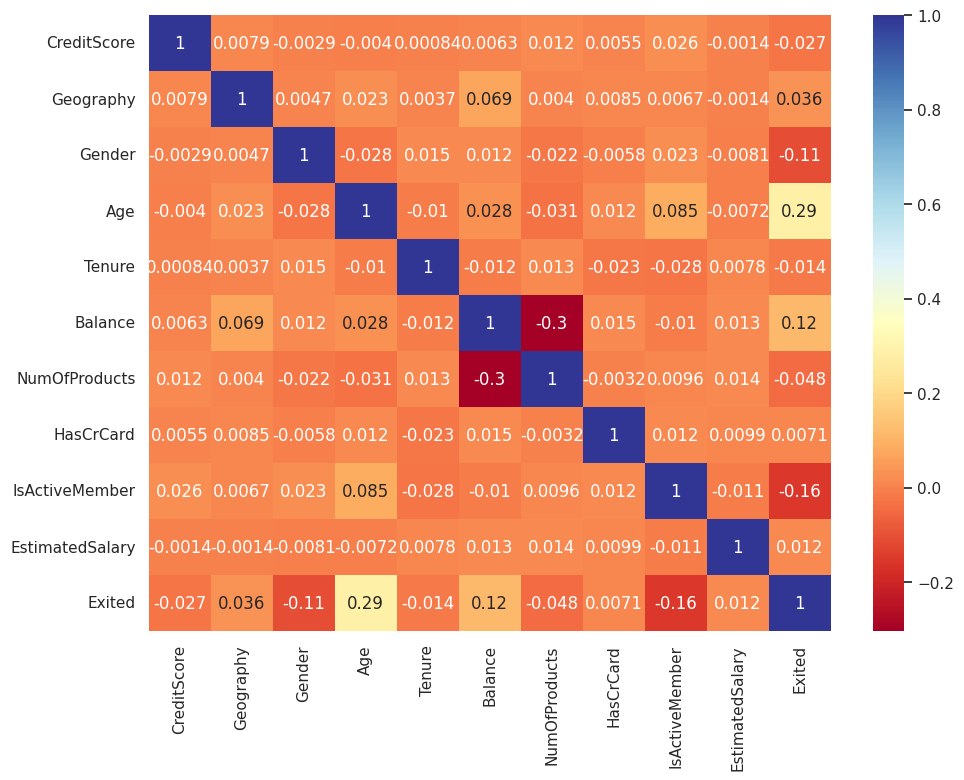

In [29]:
plt.subplots(figsize=(11,8))
sns.heatmap(df2.corr(), annot=True, cmap="RdYlBu")
plt.show()

Graficos para 3 variables: Edad vs HasCrCard vs Exited

In [30]:
df3 = data;

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.scatterplot(x = "Age", y = "HasCrCard", data = df3, hue="Exited")

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='HasCrCard', ylabel='Age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


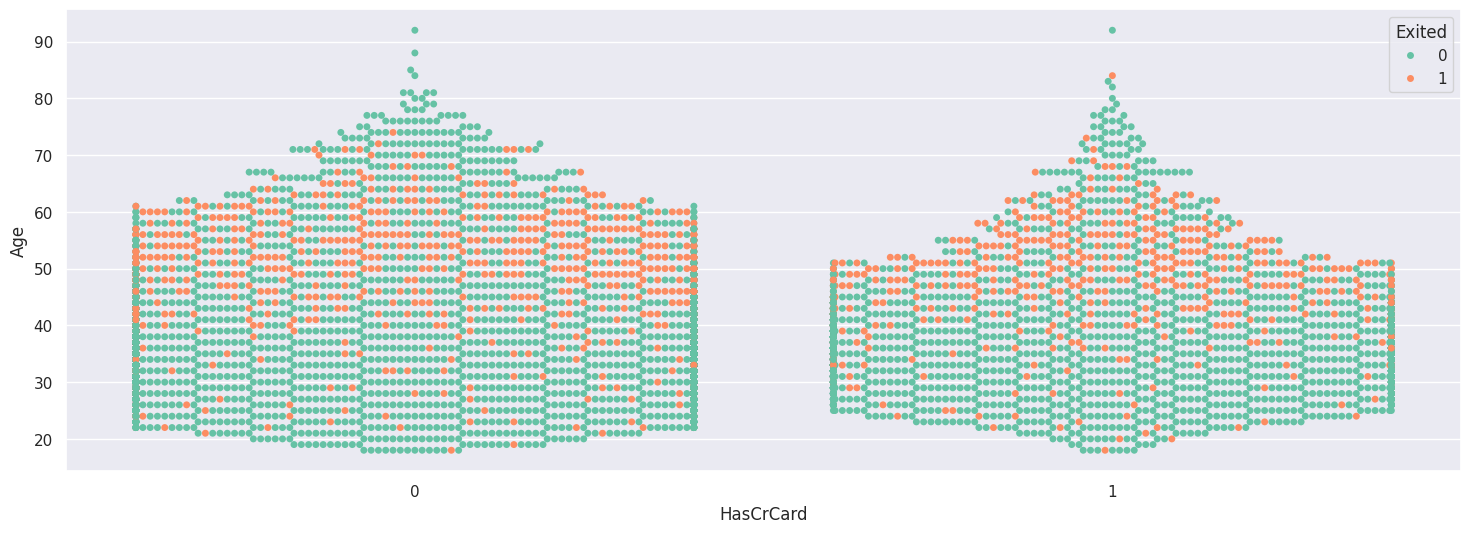

In [36]:
_, ax = plt.subplots( figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.swarmplot(x = "HasCrCard", y = "Age", data = df3, hue="Exited")